<a href="https://colab.research.google.com/github/Jacob-Bendele/Python-Coursework/blob/master/HW6Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jacob Bendele<br>
• Practice with Kmeans and the Iris dataset



##Imports

In [ ]:
!pip3 install scipy

In [ ]:
!pip3 install pyclustering

     |████████████████████████████████| 2.6MB 2.8MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.9.3.1-cp36-none-any.whl size=2599356 sha256=240e009c6d381766ff339115e3ee0137fdbee2efb008527137505694e3917e91
  Stored in directory: /root/.cache/pip/wheels/34/d6/ac/59746c226a35752edcd786d3ab96f9b547a2b70d0fbda92015
Successfully built pyclustering


In [ ]:
import os
import pandas as pd
import numpy as np
from math import *

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from scipy.spatial import distance

from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
import matplotlib.pyplot as plt


##Data Setup

###Setting Up Problem Dataset (Football)


In [ ]:
footballData = {'Season16':[3, 3, 2, 2, 6, 6, 7, 7, 8, 7], 'Season17':[5, 4, 8, 3, 2, 4, 3, 4, 5, 6]} 
footballDF = pd.DataFrame(footballData)

print(footballDF)

   Season16  Season17
0         3         5
1         3         4
2         2         8
3         2         3
4         6         2
5         6         4
6         7         3
7         7         4
8         8         5
9         7         6


###Using Sklearn Iris Dataset


In [ ]:
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris.target)
print(iris.data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

In [ ]:
train, test, trainLabels, testLabels = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1, stratify=iris.target)

In [ ]:
print(train.shape + test.shape)
print(iris.data.shape)

(120, 4, 30, 4)
(150, 4)


##Distance Measurement Functions

In [ ]:
counter = 0
sum = 0

def manhattan(p1, p2):
  return sum(abs(x - y) for x,y in zip(p1, p2))

def average():
  global sum, counter
  avg = sum / counter
  sum = counter = 0
  return avg

def cosine(p1, p2):
  if p1.size != 4 or p2.size != 4:
    return average()
  global sum, counter
  sum = sum + distance.cosine(p1,p2)
  counter = counter + 1
  return distance.cosine(p1, p2)

def jaccard(p1, p2):
  if p1.size != 4 or p2.size != 4:
    return average()
  global sum, counter
  sum = sum + distance.jaccard(p1,p2)
  counter = counter + 1
  return distance.jaccard(p1, p2)


##K-Means Clustering w/ Provided Football Dataset

###Manhattan Distance (4, 6) & (5, 4)

In [ ]:
metric = distance_metric(type_metric.USER_DEFINED, func=manhattan)

centers = np.array([[4, 6],
                    [5, 4]])

In [ ]:
km = kmeans(footballDF, centers, metric=metric)
km.process()

In [ ]:
km.get_centers()

[[4.0, 6.333333333333333], [5.571428571428571, 3.5714285714285716]]

In [ ]:
clusters = km.get_clusters()
print(clusters)

[[0, 2, 9], [1, 3, 4, 5, 6, 7, 8]]


In [ ]:
pointlabels = np.zeros(int(footballDF.size / footballDF.ndim))

for i in range(len(clusters)):
  for j in range(len(clusters[i])):
    pointlabels[clusters[i][j]] = int(i)

print(pointlabels)


[0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]


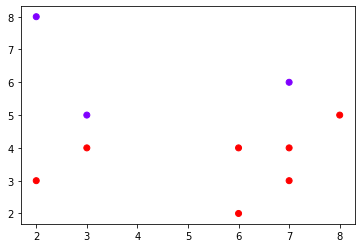

In [ ]:
plt.scatter(footballDF.loc[:,"Season16"], footballDF.loc[:,"Season17"], c=pointlabels, cmap="rainbow")

###Euclidean Distance (4, 6) & (5, 4)

In [ ]:
centers = np.array([[4, 6],
                    [5, 4]])

km = KMeans(n_clusters=2, init=centers)

In [ ]:
km.fit(footballDF)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """Entry point for launching an IPython kernel.


KMeans(algorithm='auto', copy_x=True, init=array([[4, 6],
       [5, 4]]),
       max_iter=300, n_clusters=2, n_init=10, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [ ]:
print(km.cluster_centers_)

[[2.5        5.        ]
 [6.83333333 4.        ]]


In [ ]:
print(km.labels_)

[0 0 0 0 1 1 1 1 1 1]


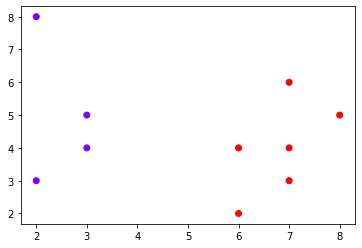

In [ ]:
plt.scatter(footballDF.loc[:,"Season16"], footballDF.loc[:,"Season17"], c=km.labels_, cmap="rainbow")

###Manhattan Distance (3, 3) & (8, 3)

In [ ]:
metric = distance_metric(type_metric.USER_DEFINED, func=manhattan)

centers = np.array([[3, 3],
                    [8, 3]])

In [ ]:
km = kmeans(footballDF, centers, metric=metric)
km.process()

In [ ]:
km.get_centers()

[[2.5, 5.0], [6.833333333333333, 4.0]]

In [ ]:
clusters = km.get_clusters()
print(clusters)

[[0, 1, 2, 3], [4, 5, 6, 7, 8, 9]]


In [ ]:
pointlabels = np.zeros(int(footballDF.size / footballDF.ndim))

for i in range(len(clusters)):
  for j in range(len(clusters[i])):
    pointlabels[clusters[i][j]] = int(i)

print(pointlabels)


[0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


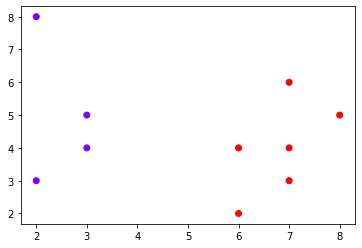

In [ ]:
plt.scatter(footballDF.loc[:,"Season16"], footballDF.loc[:,"Season17"], c=pointlabels, cmap="rainbow")

###Manhattan Distance (3, 2) & (4, 8)

In [ ]:
metric = distance_metric(type_metric.USER_DEFINED, func=manhattan)

centers = np.array([[3, 2],
                    [4, 8]])

In [ ]:
km = kmeans(footballDF, centers, metric=metric)
km.process()

In [ ]:
km.get_centers()

[[4.857142857142857, 3.5714285714285716],
 [5.666666666666667, 6.333333333333333]]

In [ ]:
clusters = km.get_clusters()
print(clusters)

[[0, 1, 3, 4, 5, 6, 7], [2, 8, 9]]


In [ ]:
pointlabels = np.zeros(int(footballDF.size / footballDF.ndim))

for i in range(len(clusters)):
  for j in range(len(clusters[i])):
    pointlabels[clusters[i][j]] = int(i)

print(pointlabels)


[0. 0. 1. 0. 0. 0. 0. 0. 1. 1.]


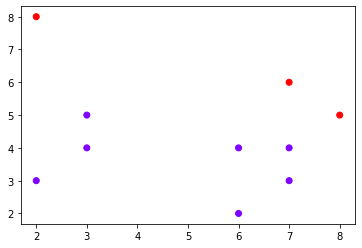

In [ ]:
plt.scatter(footballDF.loc[:,"Season16"], footballDF.loc[:,"Season17"], c=pointlabels, cmap="rainbow")

##K-Means Clustering w/ Real World IRIS Dataset

###Euclidean K-means

In [ ]:
metric = distance_metric(type_metric.EUCLIDEAN)

centers = kmeans_plusplus_initializer(iris.data, 3,kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
print(centers)

[array([6. , 2.2, 5. , 1.5]), array([4.6, 3.6, 1. , 0.2]), array([7.7, 3.8, 6.7, 2.2])]


In [ ]:
km = kmeans(iris.data, centers, metric=metric)
km.process()

In [ ]:
km.get_centers()

[[5.901612903225807, 2.748387096774194, 4.393548387096775, 1.4338709677419357],
 [5.005999999999999,
  3.428000000000001,
  1.4620000000000002,
  0.2459999999999999],
 [6.8500000000000005,
  3.073684210526315,
  5.742105263157893,
  2.0710526315789473]]

In [ ]:
clusters = km.get_clusters()
print(clusters)

[[50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]]


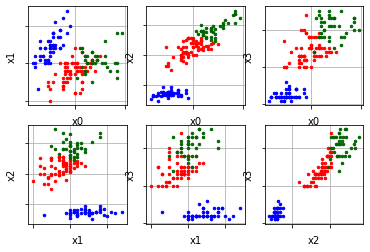

In [ ]:
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, iris.data.tolist())
visualizer.show(max_row_size=3)

In [ ]:
km.get_total_wce()

97.20457357401648

In [ ]:
#Accuracy
hist = np.zeros(3)
output = np.zeros(3)
irisCount = np.zeros(3)
counter = 0

for i in range(len(clusters)):
  for j in range(len(clusters[i])):
    hist[iris.target[clusters[i][j]]] += 1

    if j == (len(clusters[i]) - 1):
      if hist[0] >= hist[1] and hist[0] >= hist[2]:
        output[i] = hist[0]
      elif hist[1] >= hist[0] and hist[1] >= hist[2]:
        output[i] = hist[1]
      else:
        output[i] = hist[2]
      
      hist[0] = 0
      hist[1] = 0
      hist[2] = 0

for i in range(len(iris.target)):
  if iris.target[i] == 0:
    irisCount[0] += 1
  if iris.target[i] == 1:
    irisCount[1] += 1
  if iris.target[i] == 2:
    irisCount[2] += 1  


print("Accuracy Cluster 0: ", output[0]/irisCount[0])
print("Accuracy Cluster 1: ", output[1]/irisCount[1])
print("Accuracy Cluster 2: ", output[2]/irisCount[2])
print("Total Accuracy: ", (output[0]/irisCount[0] + output[1]/irisCount[1] + output[2]/irisCount[2]) / 3)

Accuracy Cluster 0:  0.96
Accuracy Cluster 1:  1.0
Accuracy Cluster 2:  0.72
Total Accuracy:  0.8933333333333332


###Cosine K-means


In [ ]:
metric = distance_metric(type_metric.USER_DEFINED, func=cosine)

centers = kmeans_plusplus_initializer(iris.data, 3, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
print(centers)

[array([6.7, 2.5, 5.8, 1.8]), array([4.6, 3.6, 1. , 0.2]), array([5. , 2. , 3.5, 1. ])]


In [ ]:
km = kmeans(iris.data, centers, metric=metric)
km.process()

In [ ]:
km.get_centers()

[[6.5370370370370345,
  2.9648148148148143,
  5.498148148148147,
  1.9944444444444442],
 [5.005999999999999,
  3.428000000000001,
  1.4620000000000002,
  0.2459999999999999],
 [5.939130434782609,
  2.7630434782608697,
  4.210869565217391,
  1.3021739130434782]]

In [ ]:
clusters = km.get_clusters()
print(clusters)

[[70, 72, 83, 84, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]


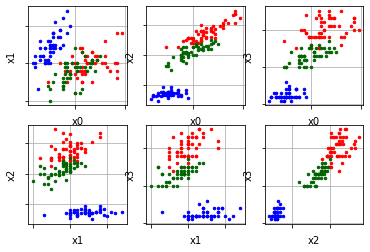

In [ ]:
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, iris.data.tolist())
visualizer.show(max_row_size=3)

In [ ]:
km.get_total_wce()

0.16165368136016434

In [ ]:
#Accuracy
hist = np.zeros(3)
output = np.zeros(3)
irisCount = np.zeros(3)
counter = 0

for i in range(len(clusters)):
  for j in range(len(clusters[i])):
    hist[iris.target[clusters[i][j]]] += 1

    if j == (len(clusters[i]) - 1):
      if hist[0] >= hist[1] and hist[0] >= hist[2]:
        output[i] = hist[0]
      elif hist[1] >= hist[0] and hist[1] >= hist[2]:
        output[i] = hist[1]
      else:
        output[i] = hist[2]
      
      hist[0] = 0
      hist[1] = 0
      hist[2] = 0

for i in range(len(iris.target)):
  if iris.target[i] == 0:
    irisCount[0] += 1
  if iris.target[i] == 1:
    irisCount[1] += 1
  if iris.target[i] == 2:
    irisCount[2] += 1  


print("Accuracy Cluster 0: ", output[0]/irisCount[0])
print("Accuracy Cluster 1: ", output[1]/irisCount[1])
print("Accuracy Cluster 2: ", output[2]/irisCount[2])
print("Total Accuracy: ", (output[0]/irisCount[0] + output[1]/irisCount[1] + output[2]/irisCount[2]) / 3)

Accuracy Cluster 0:  1.0
Accuracy Cluster 1:  1.0
Accuracy Cluster 2:  0.92
Total Accuracy:  0.9733333333333333


###Jacard K-means


In [ ]:
metric = distance_metric(type_metric.USER_DEFINED, func=jaccard)

centers = kmeans_plusplus_initializer(iris.data, 3).initialize()
print(centers)

[array([5.9, 3. , 5.1, 1.8]), array([4.6, 3.1, 1.5, 0.2]), array([7.4, 2.8, 6.1, 1.9])]


In [ ]:
km = kmeans(iris.data, centers, metric=metric)
km.process()

In [ ]:
km.get_centers()

[[5.843333333333335, 3.057333333333334, 3.7580000000000027, 1.199333333333334]]

In [ ]:
clusters = km.get_clusters()
print(clusters)
print(len(clusters[0]))

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]]
150


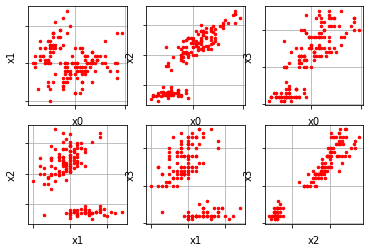

In [ ]:
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, iris.data.tolist())
visualizer.show(max_row_size=3)

In [ ]:
km.get_total_wce()

150.0

In [ ]:
#Accuracy
hist = np.zeros(3)
output = np.zeros(3)
irisCount = np.zeros(3)
counter = 0

for i in range(len(clusters)):
  for j in range(len(clusters[i])):
    hist[iris.target[clusters[i][j]]] += 1

    if j == (len(clusters[i]) - 1):
      if hist[0] >= hist[1] and hist[0] >= hist[2]:
        output[i] = hist[0]
      elif hist[1] >= hist[0] and hist[1] >= hist[2]:
        output[i] = hist[1]
      else:
        output[i] = hist[2]
      
      hist[0] = 0
      hist[1] = 0
      hist[2] = 0

for i in range(len(iris.target)):
  if iris.target[i] == 0:
    irisCount[0] += 1
  if iris.target[i] == 1:
    irisCount[1] += 1
  if iris.target[i] == 2:
    irisCount[2] += 1  


print("Accuracy Cluster 0: ", output[0]/irisCount[0])
print("Accuracy Cluster 1: ", output[1]/irisCount[1])
print("Accuracy Cluster 2: ", output[2]/irisCount[2])
print("Total Accuracy: ", (output[0]/irisCount[0] + output[1]/irisCount[1] + output[2]/irisCount[2]) / 3)

Accuracy Cluster 0:  1.0
Accuracy Cluster 1:  0.0
Accuracy Cluster 2:  0.0
Total Accuracy:  0.3333333333333333
